In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2022-04-10 / Aki Taanila


# Selittävä analytiikka - parhaat käytänteet

Oletan, että muistion https://nbviewer.org/github/taanila/kuvaileva/blob/main/kuvaileva.ipynb sisältö on lukijalle tuttu.

Menetelmät:

* kategoriset muuttujat -> **ristiintaulukointi**
* kategorinen ja määrällinen muuttuja -> määrällisen muuttujan **luokittelu** ja sen jälkeen **ristiintaulukointi**
* kategorinen ja määrällinen muuttuja -> **tilastolliset tunnusluvut** kategorisen muuttujan määräämissä ryhmissä
* määrälliset muuttujat -> **hajontakaavio** ja **korrelaatiokerroin**.

Tässä muistiossa käytän laskentaan seuraavia funktioita:

* **crosstab** ristiintaulukointiin
* **cut** määrällisen muuttujan luokitteluun
* **groupby** ryhmittelyyn
* **describe** tilastollisten tunnuslukujen laskentaan
* **dropna** puuttuvia arvoja sisältävien rivien poistamiseen
* **cor** korrelaatiokertoimen laskemiseen.

Tässä muistiossa käytän seuraavia funktioita kaavioiden luontiin:

* **plot.bar** pystypylväskaavio
* **plot.barh** vaakapylväskaavio                  
* **histplot** seaborn-kirjaston histogrammi, joka esittää luokitellun jakauman
* **barplot** seaborn-kirjaston pylväskaavio, joka esittää oletuksena keskiarvot
* **boxplot** seaborn-kirjaston boxplot, joka esittää viiden luvun yhteenvedon
* **scatterplot** seaborn-kirjaston hajontakaavio
* **jointplot** seaborn-kirjaston hajontakaavio terästettynä reunajakaumilla


* **heatmap** seaborn-kirjaston värikartta korrelaatioiden visualisointiin
* **pairplot** seaborn-kirjaston usean hajontakaavion kokoelma


* **displot** seaborn-kirjaston usean kaavion kokoelma (histplot)
* **catplot** seaborn-kirjaston usean kaavion kokoelma (countplot, barplot, boxplot)
* **relplot** seaborn-kirjaston usean kaavion kokoelma (scatterplot).

Tilastollisella merkitsevyystestauksella testaan onko otoksessa havaittu ero/riippuvuus tilastollisesti merkitsevää (yleistettävissä otoksesta laajempaan joukkoon, josta otos on poimittu). Tilastollisiin merkitsevyyden testauksiin käytän:

* **chi2_contingency** khiin neliö -testi ristiintaulukoinnin testaamiseen
* **ttest_ind** riippumattomien otosten t-testi kahden ryhmän keskiarvojen vertaamiseen
* **f_oneway** F-testi useamman ryhmän keskiarvojen vertaamiseen
* **pearsonr** korrelaatiokertoimen testaamiseen


## Alkuvalmistelut

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Merkitsevyystestaukseen
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, pearsonr

# Kaavioiden prosenttiakselin muotoiluun
from matplotlib.ticker import PercentFormatter
ticks = PercentFormatter(xmax=100, decimals=0, symbol=' %')

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')

# Muuttujien tekstimuotoisia arvoja
sukup = ['mies', 'nainen']
koulutus = ['peruskoulu', '2. aste', 'korkeakoulu', 'ylempi korkeakoulu']
tyytyväisyys = ['erittäin tyytymätön', 'tyytymätön', 'siltä väliltä', 'tyytyväinen', 'erittäin tyytyväinen']

# Luokkarajat iän luokitteluun
ikäluokat = [19, 29, 39, 49, 59, 69]

df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


## Ristiintaulukointi (kategoriset muuttujat)

In [4]:
# Ristiintaulukointi lukumäärinä
df1 = pd.crosstab(df['johto'], df['sukup'])

df1.index = tyytyväisyys
df1.index.name = 'tyytyväisyys johtoon'
df1.columns = sukup
df1.loc['n'] = df1.sum()
df1

,mies,nainen
tyytyväisyys johtoon,,
erittäin tyytymätön,7,0
tyytymätön,15,1
siltä väliltä,23,7
tyytyväinen,15,8
erittäin tyytyväinen,3,3
n,63,19


### Khiin neliö -testi

https://docs.scipy.org/doc//scipy-1.2.1/reference/generated/scipy.stats.chi2_contingency.html

In [5]:
# khiin neliö -testi lasketaan aina lukumäärätaulukosta!
chi2_contingency(df1)

(8.853002675771554,
 0.11507299935223848,
 5,
 array([[ 5.37804878,  1.62195122],
        [12.29268293,  3.70731707],
        [23.04878049,  6.95121951],
        [17.67073171,  5.32926829],
        [ 4.6097561 ,  1.3902439 ],
        [63.        , 19.        ]]))

Khiin neliö -testin p-arvo on 0.115, joten riippuvuus ei ole merkitsevää.

Text(0, 0.5, 'lukumäärä')

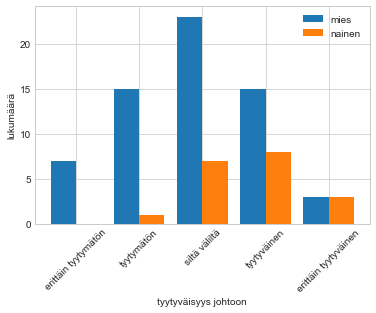

In [6]:
# Ristiintaulukointi pylväinä
# drop-funktiolla pudotetaan n-rivi pois ennen kaavion laatimista
df1.drop('n').plot.bar(width=0.8, rot=45)

plt.ylabel('lukumäärä')

In [7]:
# Ristiintaulukointi prosentteina (mieti tarkkaan, haluatko prosentit sarakkeiden summista vai rivien summista!)
df2 = pd.crosstab(df['johto'], df['sukup'], normalize='columns') * 100

df2.index = tyytyväisyys
df2.index.name = 'tyytyväisyys johtoon'
df2.columns = sukup

df2.style.format('{:.1f} %').background_gradient(cmap='Reds')

,mies,nainen
tyytyväisyys johtoon,,
erittäin tyytymätön,11.1 %,0.0 %
tyytymätön,23.8 %,5.3 %
siltä väliltä,36.5 %,36.8 %
tyytyväinen,23.8 %,42.1 %
erittäin tyytyväinen,4.8 %,15.8 %


Värikarttoja https://matplotlib.org/stable/tutorials/colors/colormaps.html

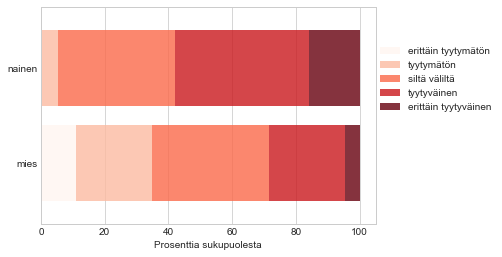

In [8]:
# Edellinen 100 % pinottuina vaakapylväinä
# T vaihtaa taulukon rivit ja sarakkeet (kaavion arvosarjat ja kategoriat) päittäin
# alpha-parametrilla hieman läpinäkyvyyttä väreihin
df2.T.plot.barh(stacked=True, width=0.8, cmap='Reds', alpha=0.8)

plt.xlabel('Prosenttia sukupuolesta')
plt.grid(axis='y')

# Selitteen sijoittelu
plt.legend(loc=(1, 0.5))

Usean kaavion kokonaisuuksia saan seabornin **catplot** toiminnolla (countplot). Usean kaavion kokonaisuuksien hienosäätö vaatii jonkin verran perehtymistä.

Kind-parametrin arvo **count** tarkoittaa countplot-kaaviolajia.

Catplotin koon määrittämiseen käytetään **height**- ja **aspect**-parametreja (kokeile eri arvoja).

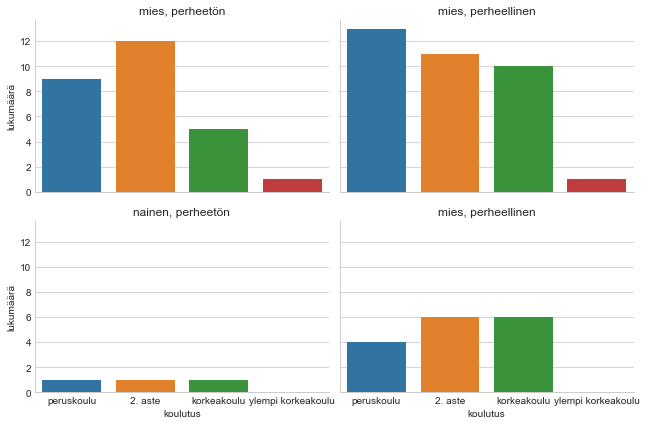

In [9]:
# Koulutuksen jakauma sukupuolen ja perhesuhteen mukaan
g = sns.catplot(x='koulutus', col='perhe', row='sukup', data=df, kind='count', height=3, aspect=1.5)

g.set_xticklabels(koulutus)
g.set_ylabels('lukumäärä')

# Seuraavassa määritän kaavioiden otsikot
titles = ['mies, perheetön','mies, perheellinen', 'nainen, perheetön', 'mies, perheellinen']
for ax, title in zip(g.axes.flatten(), titles):
    ax.set_title(title)

## Ristiintaulukointi (kategorinen ja määrällinen muuttuja)

Ennen ristiintaulukointia määrällinen muuttuja täytyy luokitella.

In [10]:
# Iän luokittelu
df['ikäluokka'] = pd.cut(df['ikä'], bins=ikäluokat, right=False)

df3 = pd.crosstab(df['ikäluokka'], df['sukup'])
df3.columns = sukup
df3

,mies,nainen
ikäluokka,,
"[19, 29)",13,1
"[29, 39)",24,6
"[39, 49)",17,8
"[49, 59)",7,4
"[59, 69)",2,0


Usean kaavion kokonaisuuksia saan seabornin **displot** toiminnoilla (histplot). Usean kaavion kokonaisuuksien hienosäätö vaatii jonkin verran perehtymistä.

Kind-parametrin arvo **hist** tarkoittaa histplot-kaaviolajia.

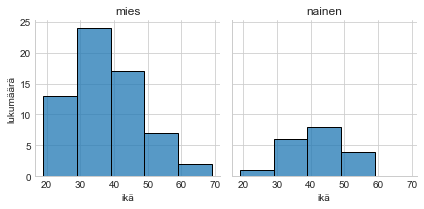

In [11]:
# Ikäjakauma sukupuolen mukaan
g = sns.displot(x='ikä', col='sukup', data=df, kind='hist', bins=ikäluokat, height=3, aspect=1)

g.set_ylabels('lukumäärä')

# Kaavioiden otsikot sukup-listasta
for ax, title in zip(g.axes.flatten(), sukup):
    ax.set_title(title)

## Tilastollisia tunnuslukuja (kategorinen ja määrällinen muuttuja)

In [12]:
# Palkan tunnusluvut koulutuksen mukaan
df3 = df.groupby('koulutus')['palkka'].describe()

df3.index = koulutus

df3.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
peruskoulu,27,2310,473,1638,2008,2144,2534,3587
2. aste,30,2403,534,1521,2008,2378,2729,3510
korkeakoulu,22,2887,1108,1559,2222,2710,2925,6278
ylempi korkeakoulu,2,5147,110,5069,5108,5147,5186,5225


([<matplotlib.axis.XTick at 0x163a0aa3a90>,
 [Text(0, 0, 'peruskoulu'),
  Text(1, 0, '2. aste'),
  Text(2, 0, 'korkeakoulu'),
  Text(3, 0, 'ylempi korkeakoulu')])

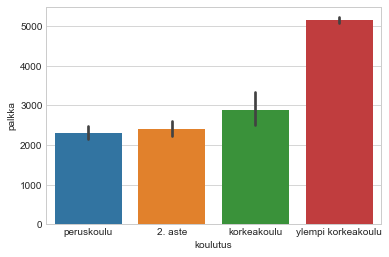

In [13]:
# Palkkakeskiarvot koulutuksen mukaan; näkyvillä myös virhemarginaalit (musta viiva)
sns.barplot(x='koulutus', y='palkka', data=df)

# x-akselillle koulutusten tekstimuotoiset arvot
plt.xticks(ticks=[0, 1, 2, 3], labels=koulutus)

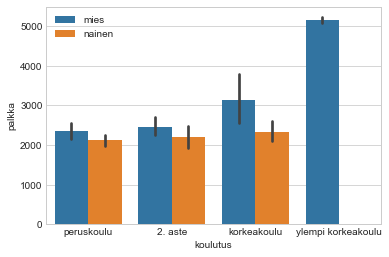

In [14]:
# Palkkakeskiarvot koulutuksen ja sukupuolen mukaan
ax = sns.barplot(x='koulutus', y='palkka', hue='sukup', data=df)

plt.xticks(ticks=[0, 1, 2, 3], labels=koulutus)

# Selitteeseen tekstimuotoiset nimet
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['mies', 'nainen'])

([<matplotlib.axis.XTick at 0x163a05e0250>,
 [Text(0, 0, 'peruskoulu'),
  Text(1, 0, '2. aste'),
  Text(2, 0, 'korkeakoulu'),
  Text(3, 0, 'ylempi korkeakoulu')])

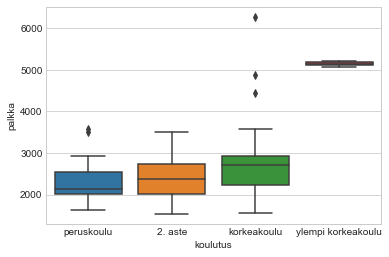

In [15]:
# Palkka koulutuksen mukaan boxplottina

sns.boxplot(x='koulutus', y='palkka', data=df)

plt.xticks(ticks=[0, 1, 2, 3], labels=koulutus)

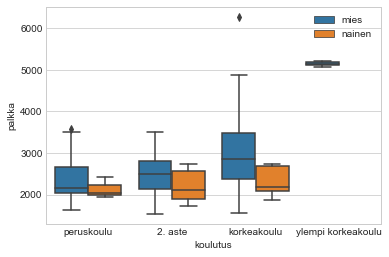

In [16]:
# Palkka koulutuksen ja sukupuolen mukaan

ax = sns.boxplot(x='koulutus', y='palkka', hue='sukup', data=df)

plt.xticks(ticks=[0, 1, 2, 3], labels=koulutus)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['mies', 'nainen'])

Usean kaavion kokonaisuuksia saan seabornin **catplot**-toiminnolla (barplot, boxplot).

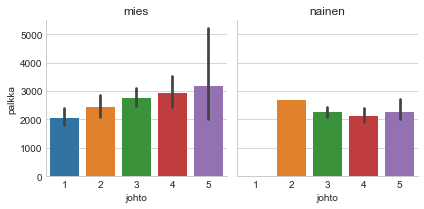

In [17]:
# Tyytyväisyys johtoon sukupuolen mukaan

g = sns.catplot(x='johto', y='palkka', col='sukup', data=df, kind='bar', height=3, aspect=1)

for ax, title in zip(g.axes.flatten(), sukup):
    ax.set_title(title)

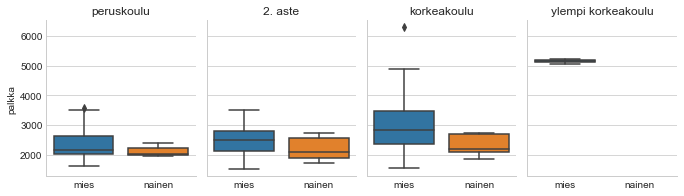

In [18]:
# Palkka sukupuolen ja koulutuksen mukaan

g = sns.catplot(x='sukup', y='palkka', col='koulutus', data=df, kind='box', height=3, aspect=0.8)

g.set_xlabels('')
g.set_xticklabels(sukup)

for ax, title in zip(g.axes.flatten(), koulutus):
    ax.set_title(title)

### Kahden riippumattoman otoksen t-testi

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [19]:
# Riippumattomien otosten t-testi

# Vertailtavien ryhmien muodostaminen
s1 = df['palkka'][df['sukup']==1] # miehet
s2 = df['palkka'][df['sukup']==2] # naiset

# Kahden riippumattoman (ind) otoksen t-testi

ttest_ind(s1, s2, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=3.0597612743474714, pvalue=0.003048272029697872)

Kahden riippumattoman otoksen t-testin p-arvo on 0.003, joten miesten ja naisten palkkakeskiarvo poikkeavat merkitsevästi toisistaan.

### Yksisuuntainen anova f-testi

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [20]:
# F-testi useamman ryhmän vertailuun

# Data, josta on poistettu mahdolliset palkan puuttuvia arvoja sisältävät rivit
df_dropna = df.dropna(subset=['palkka'])

# Vertailtavien ryhmien muodostaminen
k1 = df_dropna['palkka'][df_dropna['koulutus']==1] # peruskoulu
k2 = df_dropna['palkka'][df_dropna['koulutus']==2] # 2. aste
k3 = df_dropna['palkka'][df_dropna['koulutus']==3] # korkeakoulu
k4 = df_dropna['palkka'][df_dropna['koulutus']==4] # ylempi korkeakoulu

# F-testi
f_oneway(k1, k2, k3, k4)

F_onewayResult(statistic=11.675086950951924, pvalue=2.186573534680074e-06)

F-testin p-arvo on 0.000002, joten koulutusten välillä esiintyy merkiseviä eroja palkkakeskiarvojen välillä.

## Korrelaatioita ja hajontakaavioita (määrälliset muuttujat)

Määrällisten muuttujien välisiä riippuvuuksia tarkastelen korrelaatioiden ja hajontakaavioiden avulla.

In [21]:
# Avaan toisen datan, jossa asteikolla 0-10 mitattuja mielikuvia
hatco = pd.read_excel('https://taanila.fi/hatco.xlsx')
hatco

,id,Delivery Speed,Price Level,Price Flexibility,Manufacturer Image,Service,Salesforce Image,Product Quality,Satisfaction Level,Firm size,Usage level %,Industry type,Buying situation
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,4.2,0,32,1,1
1,2,1.8,3.0,6.3,6.6,2.5,4.0,8.4,4.3,1,43,0,1
2,3,3.4,5.2,5.7,6.0,4.3,2.7,8.2,5.2,1,48,1,2
3,4,2.7,1.0,7.1,5.9,1.8,2.3,7.8,3.9,1,32,1,1
4,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,6.8,0,58,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.6,1.6,6.4,5.0,0.7,2.1,8.4,3.4,1,25,1,1
96,97,6.1,0.5,9.2,4.8,3.3,2.8,7.1,5.2,0,60,1,3
97,98,2.0,2.8,5.2,5.0,2.4,2.7,8.4,3.7,1,38,0,1
98,99,3.1,2.2,6.7,6.8,2.6,2.9,8.4,4.3,1,42,0,1


In [22]:
# Muodostan datan, jossa ainoastaan mielikuvamuuttujat
hatco1 = hatco.loc[:, 'Delivery Speed':'Satisfaction Level']

In [23]:
# Mielikuvamuuttujien korrelaatiokertoimet
korrelaatiot = hatco1.corr()
korrelaatiot

,Delivery Speed,Price Level,Price Flexibility,Manufacturer Image,Service,Salesforce Image,Product Quality,Satisfaction Level
Delivery Speed,1.000000,-0.349225,0.509295,0.050414,0.611901,0.077115,-0.482631,0.650632
Price Level,-0.349225,1.000000,-0.487213,0.272187,0.512981,0.186243,0.469746,0.028395
Price Flexibility,0.509295,-0.487213,1.000000,-0.116104,0.066617,-0.034316,-0.448112,0.524814
Manufacturer Image,0.050414,0.272187,-0.116104,1.000000,0.298677,0.788225,0.199981,0.475934
Service,0.611901,0.512981,0.066617,0.298677,1.000000,0.240808,-0.055161,0.631233
Salesforce Image,0.077115,0.186243,-0.034316,0.788225,0.240808,1.000000,0.177294,0.340909
Product Quality,-0.482631,0.469746,-0.448112,0.199981,-0.055161,0.177294,1.000000,-0.283340
Satisfaction Level,0.650632,0.028395,0.524814,0.475934,0.631233,0.340909,-0.283340,1.000000


<AxesSubplot:>

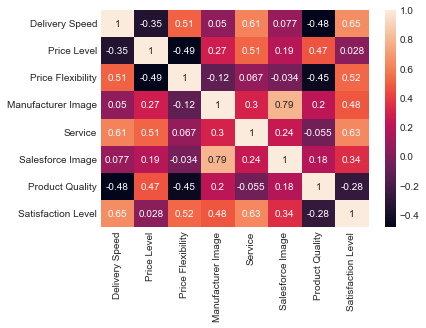

In [24]:
# Seaborn-kirjaston heatmap värittää korrelaatiokertoimia
# annot = True näyttää värien lisäksi myös lukuarvot
sns.heatmap(korrelaatiot, annot=True)

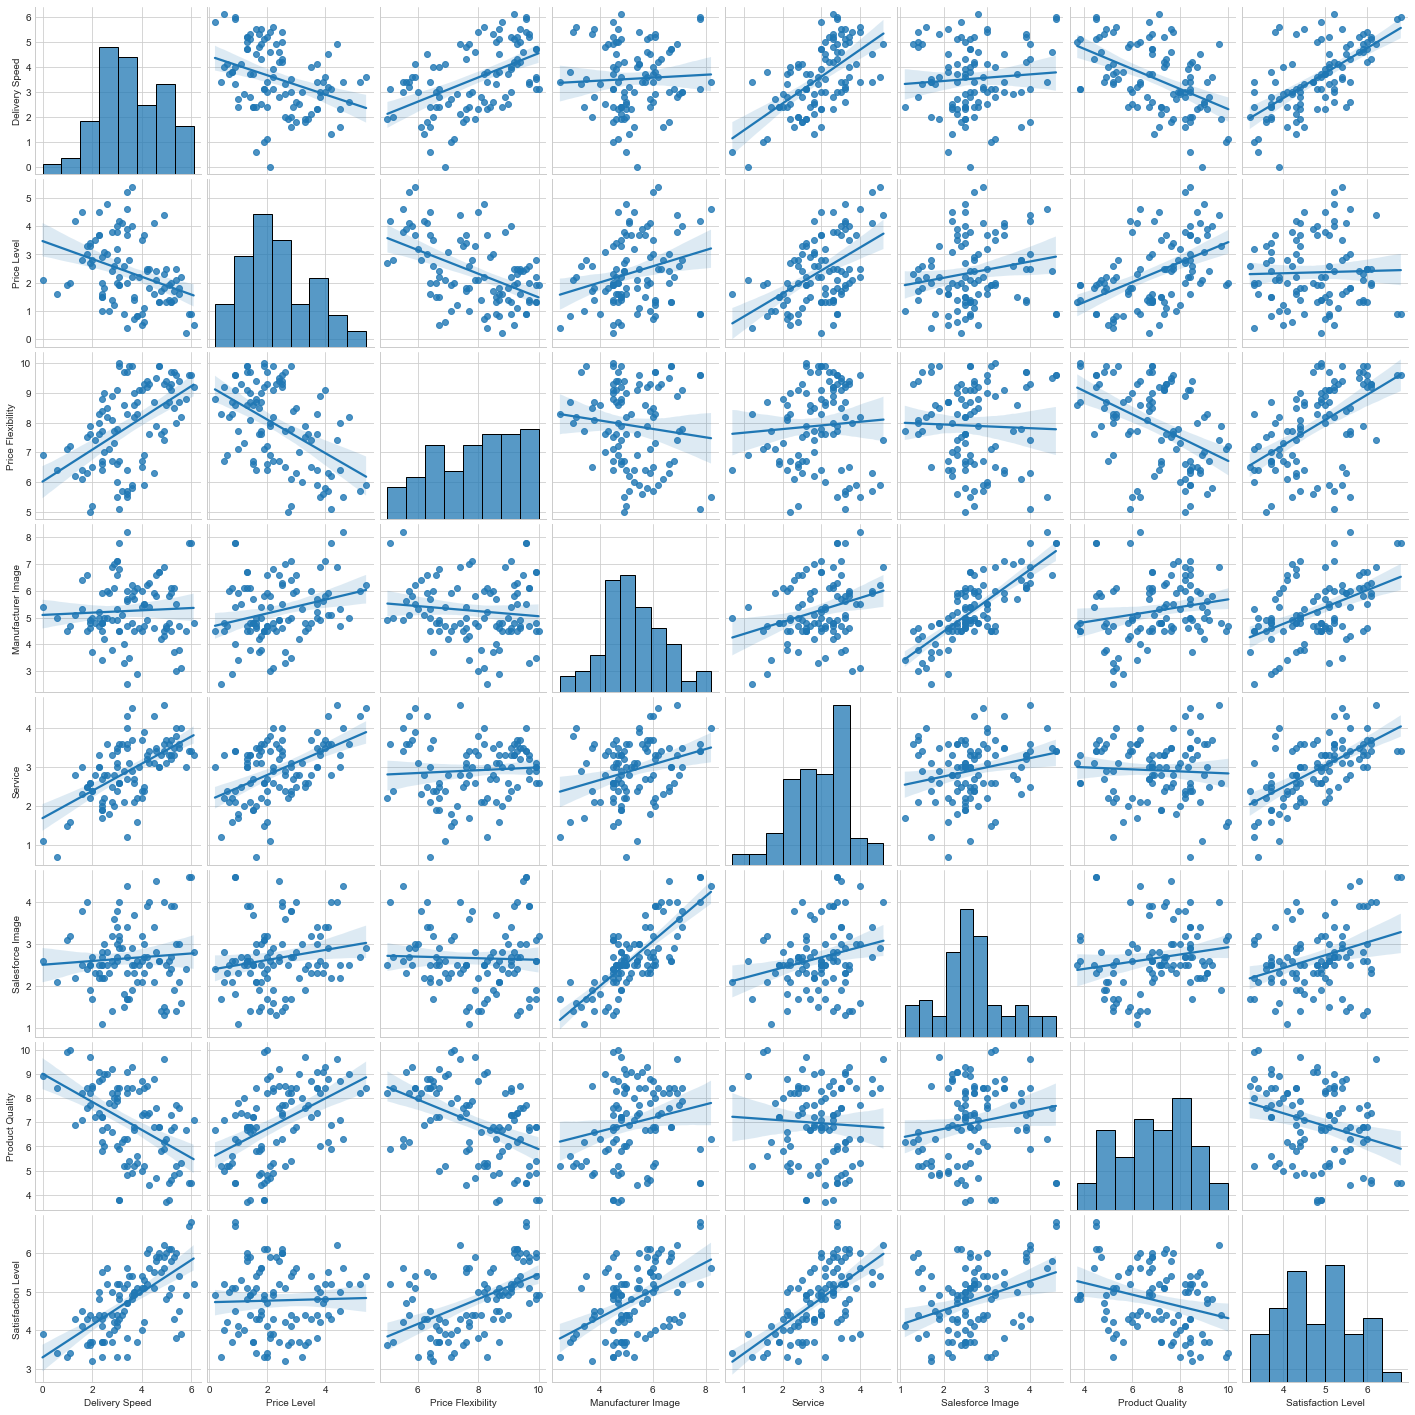

In [25]:
# Mielikuvamuuttujien hajontakaaviot (tämän tulostuminen kestää hetken)
sns.pairplot(hatco1, kind='reg')

<AxesSubplot:xlabel='Delivery Speed', ylabel='Satisfaction Level'>

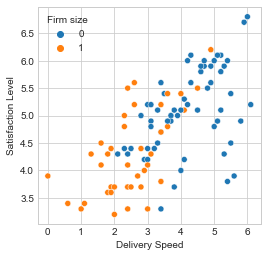

In [26]:
# Yksittäinen hajontakaavio (pienet firmat sinisellä, isot oranssilla)

plt.figure(figsize=(4, 4))

sns.scatterplot(x='Delivery Speed', y='Satisfaction Level', hue='Firm size', data=hatco)

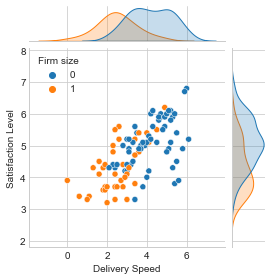

In [27]:
# jointplot sisältää myös "reunajakaumat"
sns.jointplot(x='Delivery Speed', y='Satisfaction Level', hue='Firm size', data=hatco, height=4)

Usean hajontakaavion kuvion voin rakentaa **relplot**-toiminnolla.

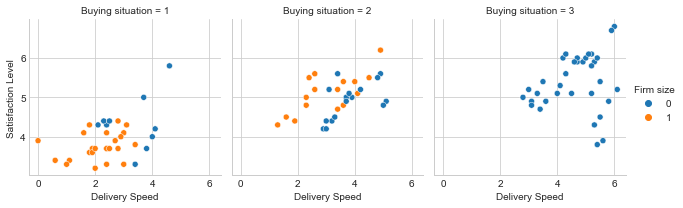

In [28]:
sns.relplot(x='Delivery Speed', y = 'Satisfaction Level', col = 'Buying situation', hue = 'Firm size', 
            data=hatco, kind='scatter', height=3, aspect=1)

### Korrelaatiokertoimen testaus

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [29]:
# Mielikuvamuuttujien korrelaatiokertoimet ja p-arvot muuttujan 'Satisfaction Level' kanssa

for var in hatco1:
    hatco1_dropna = hatco1.dropna(subset=[var, 'Satisfaction Level'])
    print(var, pearsonr(hatco1_dropna["Satisfaction Level"], hatco1_dropna[var]))

Delivery Speed (0.6506323301389191, 2.354357209803324e-13)
Price Level (0.028394665880510234, 0.7791450989655391)
Price Flexibility (0.5248141510750397, 2.0815396346392862e-08)
Manufacturer Image (0.4759338314260012, 5.599028749180165e-07)
Service (0.631232901641948, 1.917952074232071e-12)
Salesforce Image (0.3409093027606839, 0.0005188847493396814)
Product Quality (-0.28333980318451, 0.004282584841192087)
Satisfaction Level (1.0, 0.0)


Korrelaatiot Satisfaction Level -muuttujan kanssa ovat merkitseviä paitsi muuttujan Price Level kohdalla.